In [1]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Import the speech recognition data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_1/datasets/voice.csv")
df.head()

V1        V2        V3        V4        V5  Class
0  0.489927 -0.451528 -1.047990 -0.598693 -0.020418      1
1 -0.641265  0.109245  0.292130 -0.916804  0.240223      1
2  0.870593 -0.459862  0.578159  0.806634  0.835248      1
3 -0.628439 -0.316284  1.934295 -1.427099 -0.136583      1
4 -0.596399  0.015938  2.043206 -1.688448 -0.948127      1

In [3]:
# Drop the label to create the X data
X = df.drop('Class', axis=1)
# Create the y set from the "Class" column
y = df["Class"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [5]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=input_nodes))

In [6]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
127/127 [==============================] - 2s 4ms/step - loss: 0.8046 - accuracy: 0.3597
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.5732
Epoch 3/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.6968
Epoch 4/100
127/127 [==============================] - 0s 4ms/step - loss: -0.2721 - accuracy: 0.7054
Epoch 5/100
127/127 [==============================] - 0s 3ms/step - loss: -0.5790 - accuracy: 0.7054
Epoch 6/100
127/127 [==============================] - 0s 3ms/step - loss: -0.9364 - accuracy: 0.7054
Epoch 7/100
127/127 [==============================] - 1s 5ms/step - loss: -1.3716 - accuracy: 0.7054
Epoch 8/100
127/127 [==============================] - 0s 3ms/step - loss: -1.9080 - accuracy: 0.7054
Epoch 9/100
127/127 [==============================] - 1s 5ms/step - loss: -2.5465 - accuracy: 0.7054
Epoch 10/100
127/127 [==============================] - 1s 4ms/step - loss: -3.2941 -

<Axes: >

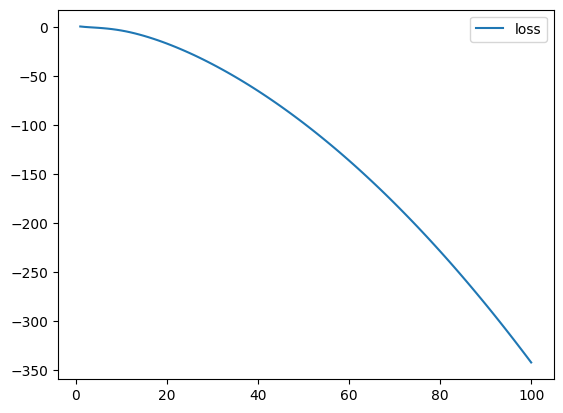

In [9]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

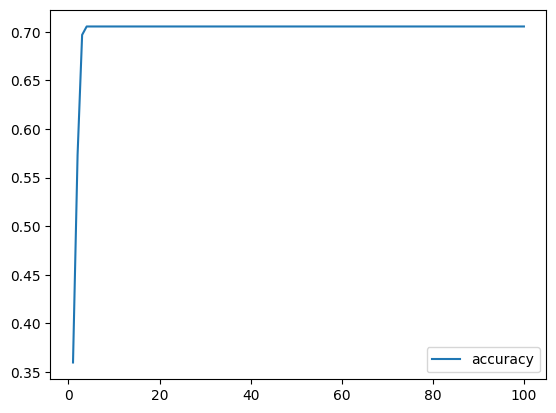

In [10]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - loss: -3.3864e+02 - accuracy: 0.7098 - 212ms/epoch - 5ms/step
Loss: -338.6400451660156, Accuracy: 0.7098445892333984


In [12]:
# Make predictions
predictions = nn_model.predict(X_test,verbose=2)
predictions

43/43 - 0s - 134ms/epoch - 3ms/step


array([[0.99999124],
       [1.        ],
       [0.99999124],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [13]:
# Round predictions
predictions_rounded = [round(prediction[0],0) for prediction in predictions]
predictions_rounded

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [14]:
# Check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rounded))


              precision    recall  f1-score   support

           1       0.71      1.00      0.83       959
           2       0.00      0.00      0.00       392

    accuracy                           0.71      1351
   macro avg       0.35      0.50      0.42      1351
weighted avg       0.50      0.71      0.59      1351



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Compare with random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9052553663952627


In [16]:
# Make predictions and produce the classification report for the random forest model
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93       959
           2       0.82      0.86      0.84       392

    accuracy                           0.91      1351
   macro avg       0.88      0.89      0.89      1351
weighted avg       0.91      0.91      0.91      1351

